___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [93]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# settings for plots
%matplotlib inline 
sns.set_theme(color_codes=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### 1.Відкрийте файл та виведіть описову статистику

In [94]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [97]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [98]:
df.duplicated().sum()

0

#### 2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

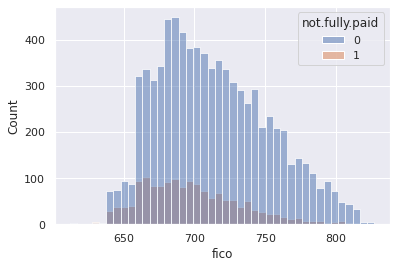

In [99]:
sns.set_style("darkgrid")

sns.histplot(data=df, x="fico", hue="not.fully.paid");

#### 3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

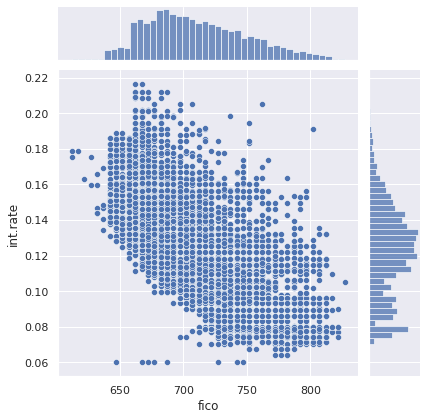

In [100]:
sns.jointplot(data=df, x="fico", y="int.rate");

#### 4.Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

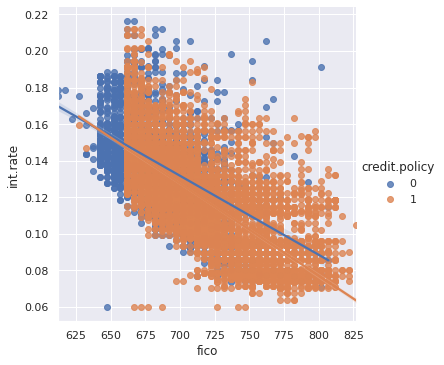

In [101]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy');

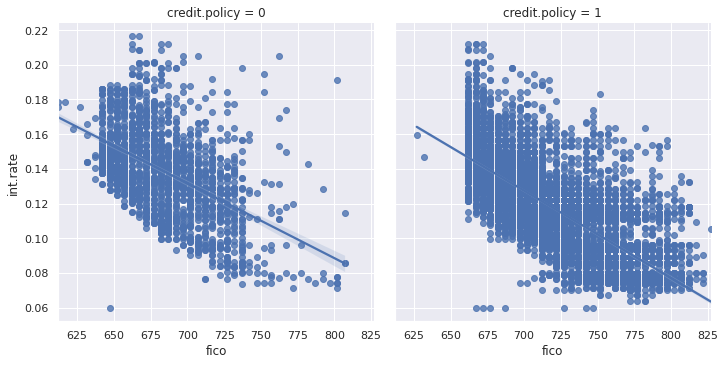

In [102]:
sns.lmplot(data=df, x="fico", y="int.rate", col="credit.policy",);

#### 5.purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [103]:
df = pd.get_dummies(df, columns=['purpose'])
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


#### 6. Розбийте датасет на тестві та трейнові дані

In [104]:
X = df[df.columns[1:]]
y = df["credit.policy"]

In [105]:
y.unique()

array([1, 0])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [107]:
# Розподіл даних credit.policy по df, train and test sets 

print("Original credit.policy True Values: {0} ({1:0.2f}%)".format(len(df.loc[df['credit.policy'] == 1]), (len(df.loc[df['credit.policy'] == 1])/len(df.index)) * 100))
print("Original credit.policy False Values: {0} ({1:0.2f}%)".format(len(df.loc[df['credit.policy'] == 0]), (len(df.loc[df['credit.policy'] == 0])/len(df.index)) * 100))
print("")
print("Training Diabetes True Values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original credit.policy True Values: 7710 (80.50%)
Original credit.policy False Values: 1868 (19.50%)

Training Diabetes True Values: 5370 (80.10%)
Training Diabetes False Values: 1334 (19.90%)

Test Diabetes True Values: 2340 (81.42%)
Test Diabetes False Values: 534 (18.58%)



#### 7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
#### 8. Для кожної з моделей виведіть матрицю, основні метрики
#### 9. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

In [108]:
def confusion_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["False","True"]],
                         columns = [i for i in ["False","True"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt='g')
    plt.xlabel("Actual")
    plt.ylabel("Predicted");

### Логістична регресія

In [109]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Score for training set: ', log_reg.score(X_train,y_train))
print('Score for test set: ', log_reg.score(X_test , y_test))

Score for training set:  0.8946897374701671
Score for test set:  0.9001391788448155


In [110]:
log_reg_pred = log_reg.predict(X_test)
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68       534
           1       0.91      0.97      0.94      2340

    accuracy                           0.90      2874
   macro avg       0.87      0.78      0.81      2874
weighted avg       0.90      0.90      0.89      2874



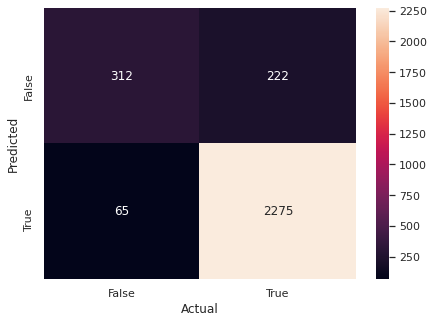

In [111]:
# Confusion matrix
confusion_mat(y_test, log_reg_pred)

### Дерево рішень

In [112]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

print('Score for training set: ', dTree.score(X_train, y_train))
print('Score for test set: ', dTree.score(X_test, y_test))

Score for training set:  1.0
Score for test set:  0.9902574808629089


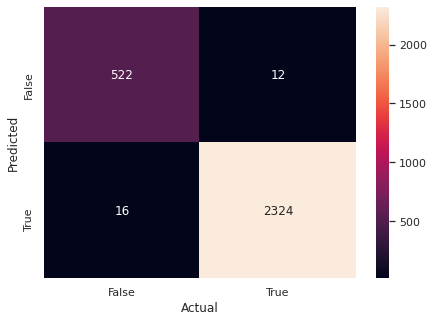

In [113]:
dTree_pred = dTree.predict(X_test)

# Confusion matrix
confusion_mat(y_test, dTree_pred)

In [114]:
print(classification_report(y_test, dTree_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       534
           1       0.99      0.99      0.99      2340

    accuracy                           0.99      2874
   macro avg       0.98      0.99      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [115]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

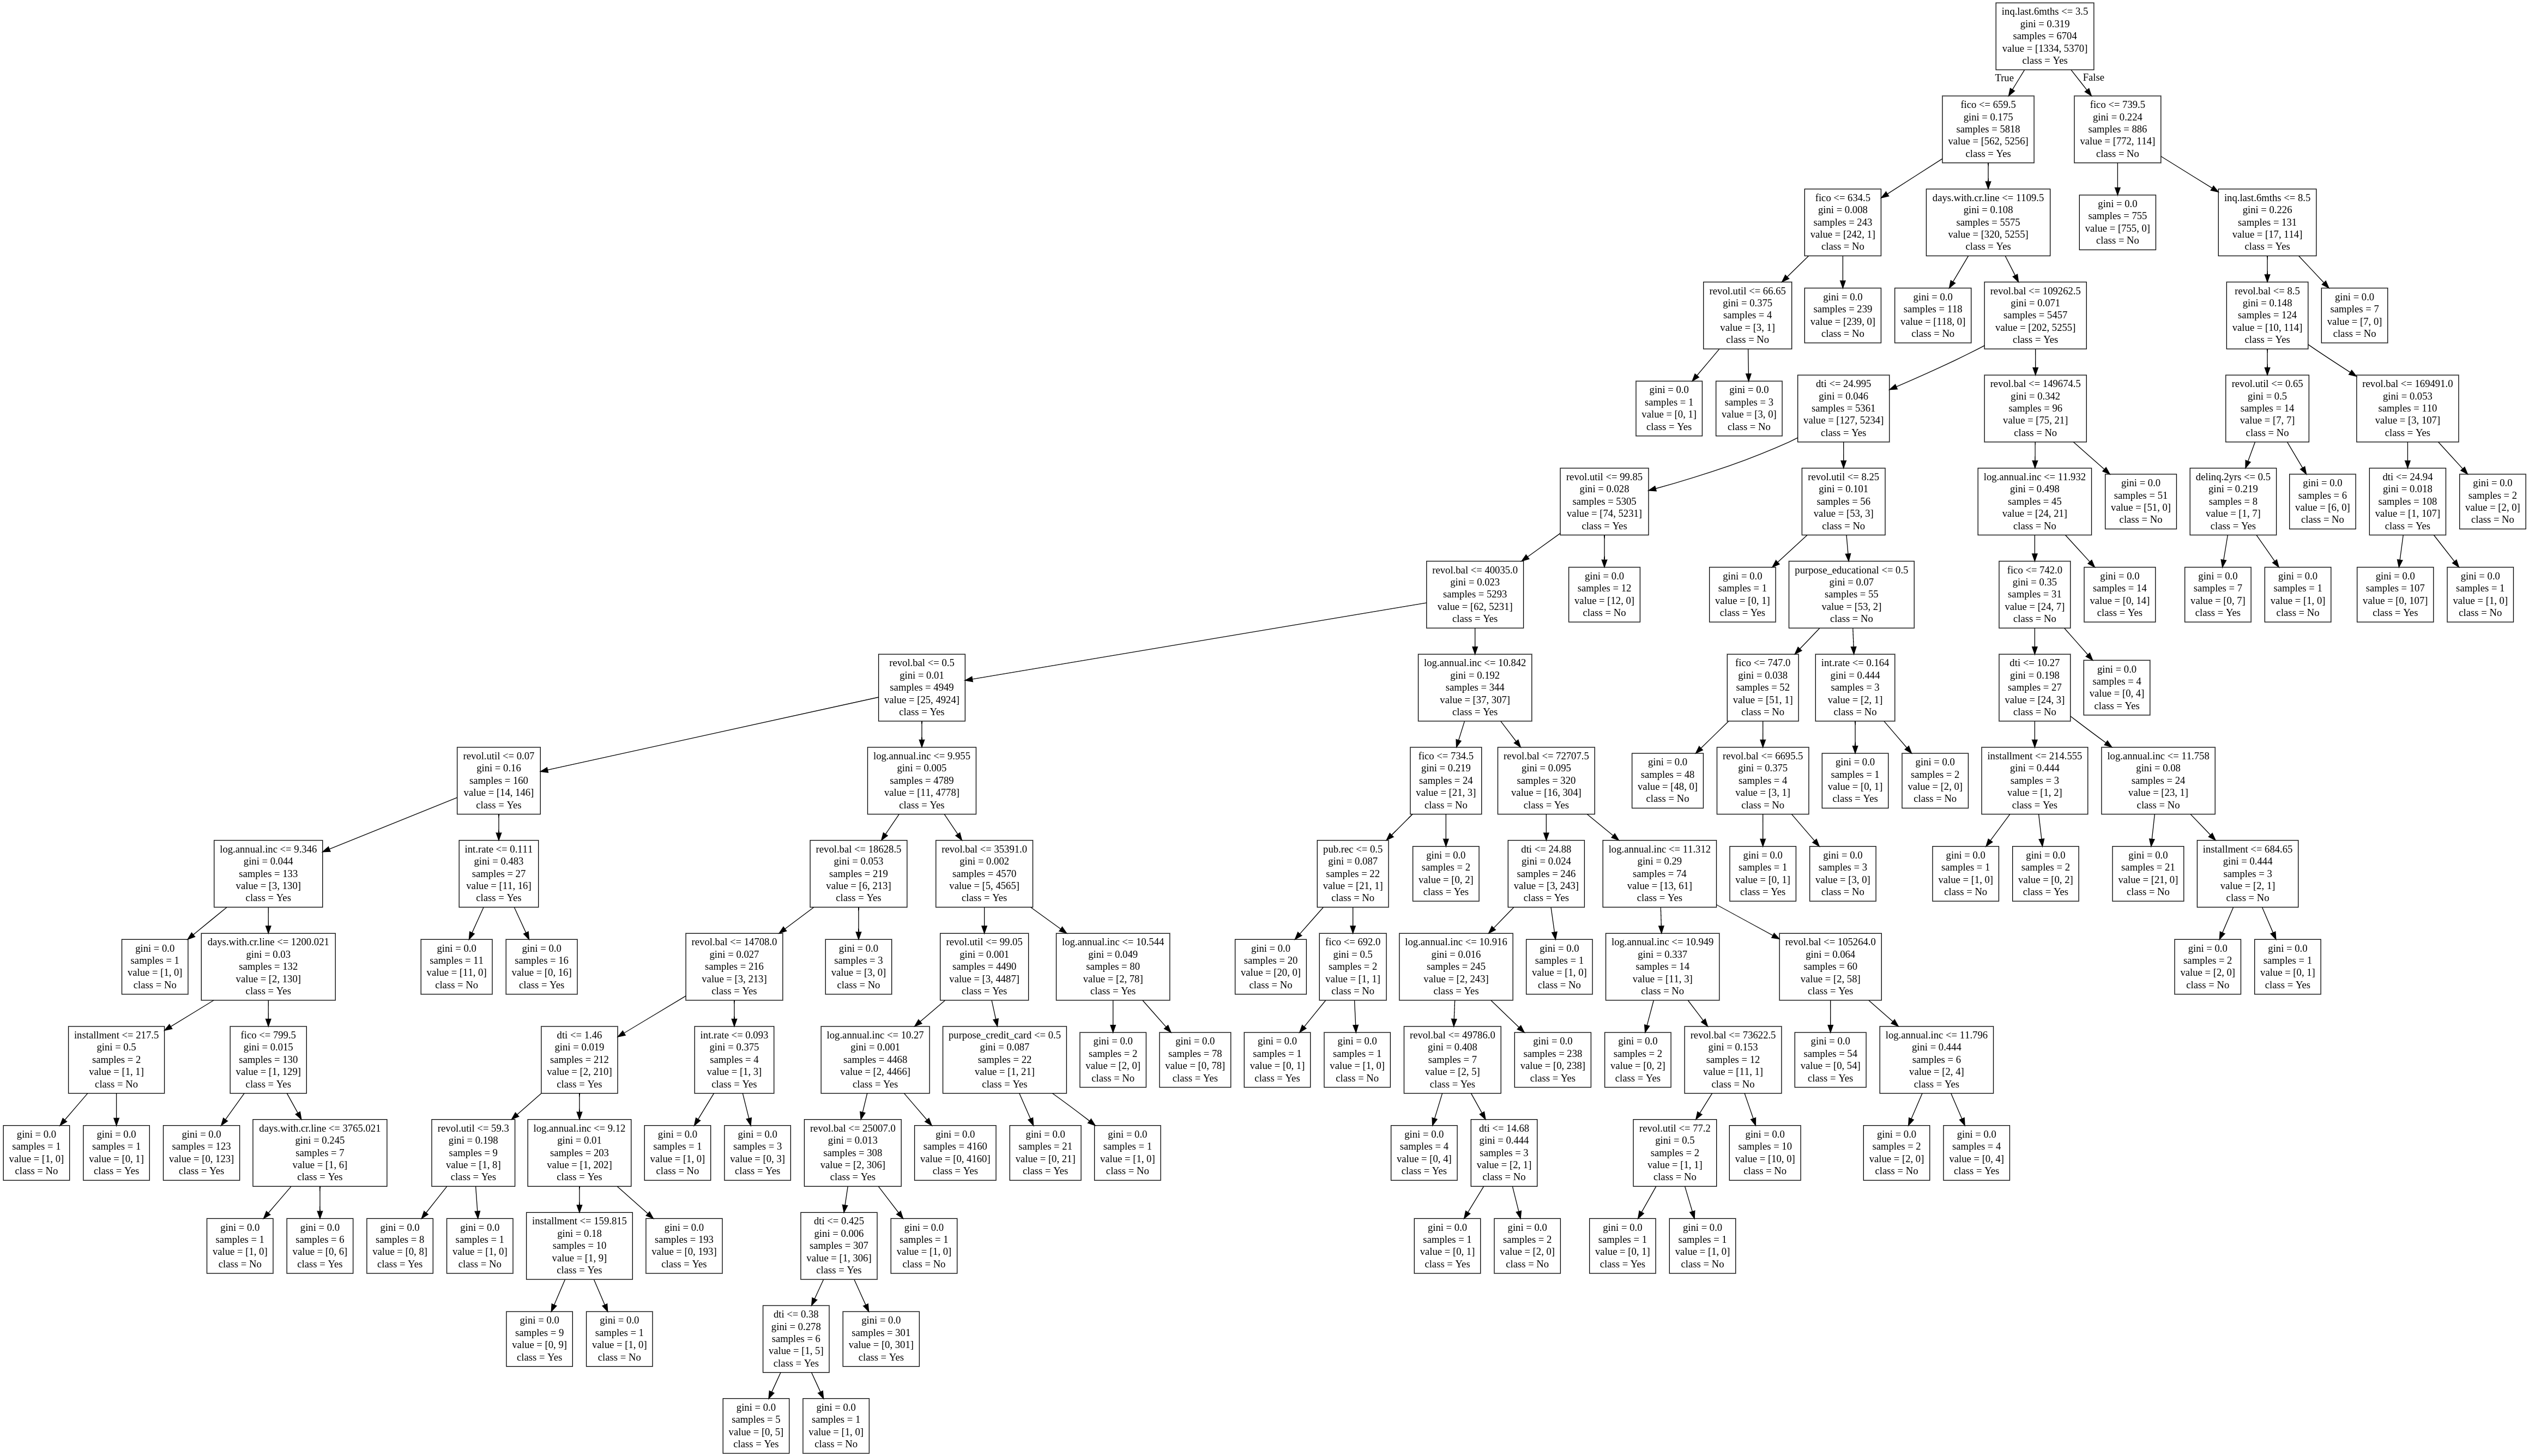

In [116]:
from IPython.display import Image
Image(filename='graphviz.png') 

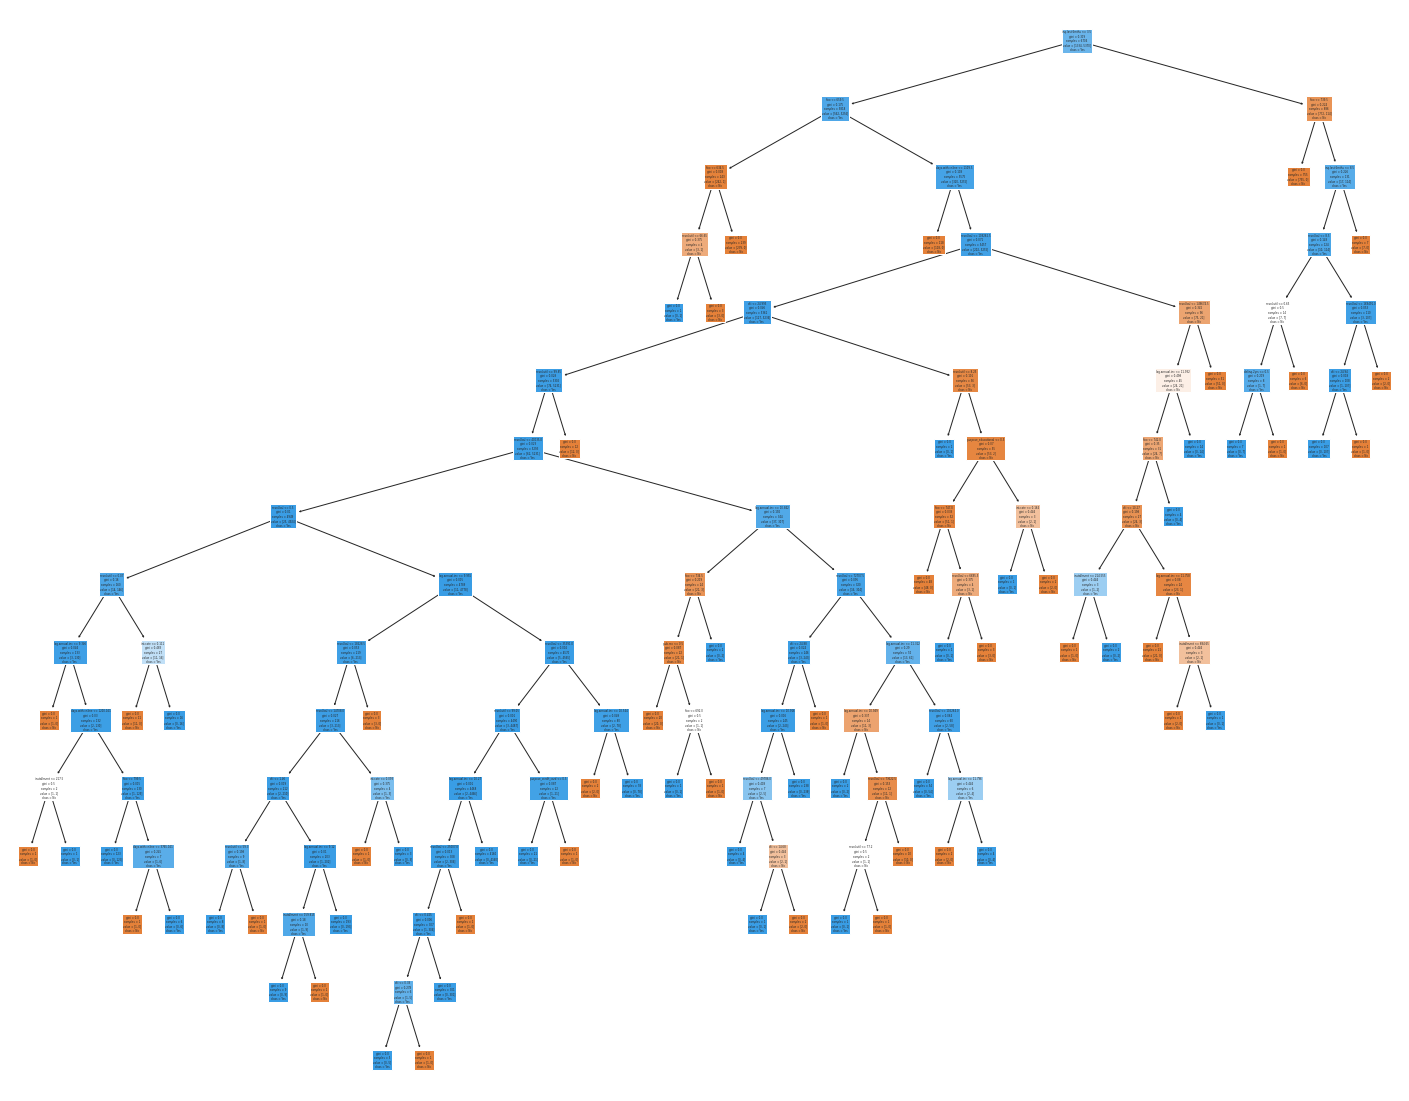

In [117]:
class_name = ['No', 'Yes']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dTree, 
                   feature_names=X.columns,  
                   class_names=class_name,
                   filled=True)

### Random Forest


In [118]:
rf = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12)
rf.fit(X_train, y_train)

print('Score for training set: ', rf.score(X_train, y_train))
print('Score for test set: ', rf.score(X_test, y_test))

Score for training set:  1.0
Score for test set:  0.9940848990953375


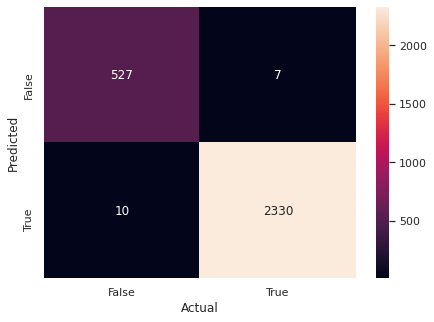

In [119]:
rf_pred = rf.predict(X_test)

# Confusion matrix
confusion_mat(y_test, rf_pred)

In [120]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       534
           1       1.00      1.00      1.00      2340

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874



### XGBoost

In [121]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

print('Score for training set: ', xgboost.score(X_train, y_train))
print('Score for test set: ', xgboost.score(X_test, y_test))

[20:32:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for training set:  1.0
Score for test set:  0.9944328462073765


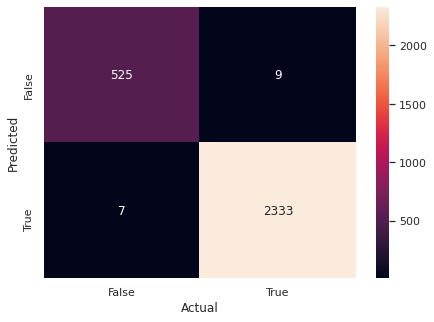

In [122]:
xgboost_pred = xgboost.predict(X_test)

# Confusion matrix
confusion_mat(y_test, xgboost_pred)

In [123]:
print(classification_report(y_test, xgboost_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       534
           1       1.00      1.00      1.00      2340

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874



#### 10. Використайте ансамбель voting для всіх моделей

In [124]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('1',log_reg),('2', dTree),('3', rf),('4', xgboost)])
voting.fit(X_train, y_train)

print('\nScore for training set: ', voting.score(X_train, y_train))
print('Score for test set: ', voting.score(X_test, y_test))

[20:32:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Score for training set:  1.0
Score for test set:  0.9940848990953375


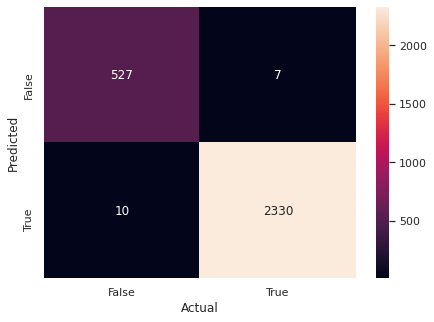

In [125]:
voting_pred = voting.predict(X_test)

# Confusion matrix
confusion_mat(y_test, voting_pred)

In [126]:
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       534
           1       1.00      1.00      1.00      2340

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874



#### Model Selection

In [127]:
models = []
model_result = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTree",DecisionTreeClassifier(max_depth=10)))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("XGBoost",xgb.XGBClassifier()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=1)))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X, y,  cv=5)
    names.append(name)
    results.append(result)
    
print('****'*8)
for i in range(len(names)):
    model_result.append((names[i],results[i].mean()))
#     print(names[i],results[i].mean())

[20:32:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [128]:
model_result

[('LogisticRegression', 0.8796222002976174),
 ('DecisionTree', 0.9883066876706803),
 ('RandomForest', 0.9864266830919506),
 ('RandomForest2', 0.9897686106281036),
 ('XGBoost', 0.9893506925328552),
 ('KNeighbors', 0.8216745613413498),
 ('MLPClassifier', 0.8049697749336356)]

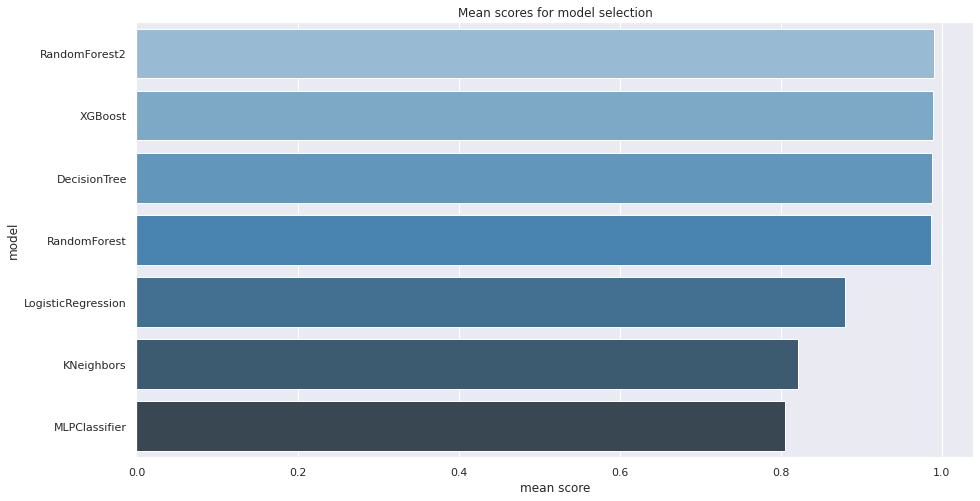

In [129]:
df_model = pd.DataFrame(model_result, columns=['model', 'mean score'])
df_model = df_model.sort_values('mean score', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='mean score', y="model", data=df_model, palette="Blues_d")
ax.set_title('Mean scores for model selection');

#### 11. Порівняйте результати моделей та зробіть висновки

In [130]:
print('Xboost:              ', xgboost.score(X_test, y_test))
print('Voting:              ', voting.score(X_test, y_test))
print('Random forest:       ', rf.score(X_test, y_test))
print('Descision Tree:      ', dTree.score(X_test, y_test))
print('Logistic regression: ', log_reg.score(X_test,y_test))



Xboost:               0.9944328462073765
Voting:               0.9940848990953375
Random forest:        0.9940848990953375
Descision Tree:       0.9902574808629089
Logistic regression:  0.9001391788448155


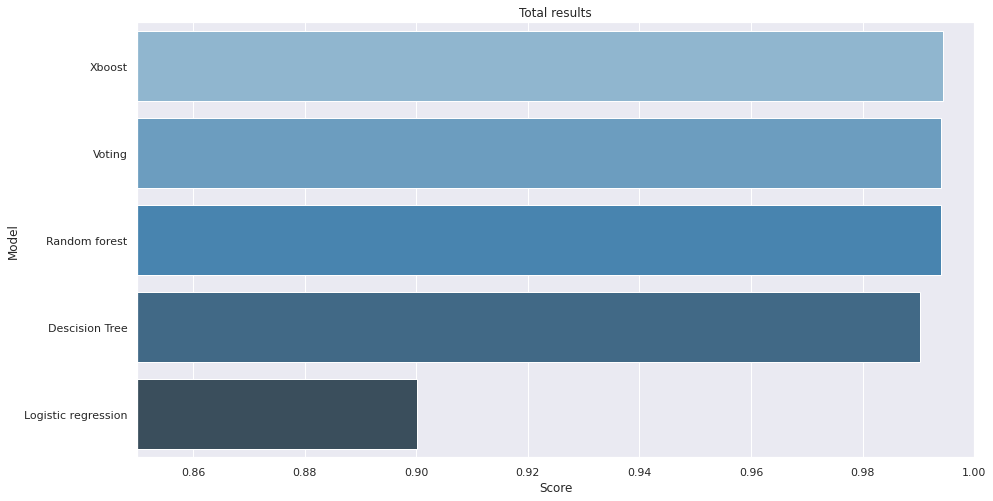

In [131]:
df2_models = pd.DataFrame()
df2_models['Model'] = ['Xboost','Voting','Random forest', 'Descision Tree', 'Logistic regression']
df2_models['Score'] = [xgboost.score(X_test, y_test), voting.score(X_test, y_test), rf.score(X_test, y_test),
                       dTree.score(X_test, y_test), log_reg.score(X_test,y_test)]

df2_models = df2_models.sort_values('Score', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Score", y="Model", data=df2_models, palette="Blues_d")
ax.set_title('Total results')
ax.set_xlim(0.85, 1);

Для експерименту, створимо синтетичні дані для credit.policy = 0

In [132]:
y.value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [133]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X, y)
y_new.value_counts()

0    7710
1    7710
Name: credit.policy, dtype: int64

In [134]:
models = []
model_result2 = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("DecisionTree",DecisionTreeClassifier(max_depth=10)))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("XGBoost",xgb.XGBClassifier()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=1)))


results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_new, y_new,  cv=5)
    names.append(name)
    results.append(result)
    
print('****'*8)
for i in range(len(names)):
    model_result2.append((names[i],results[i].mean()))
    print(names[i],results[i].mean())

[20:33:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:33:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

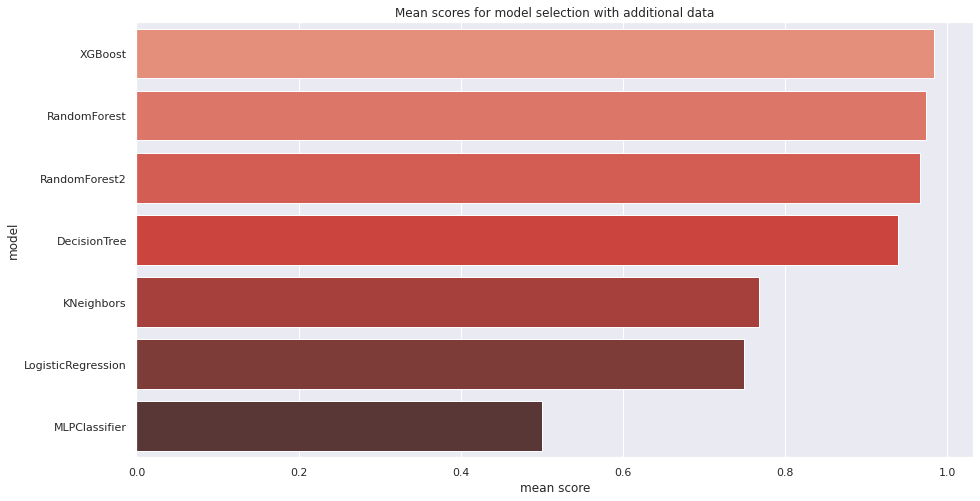

In [143]:
df3_model = pd.DataFrame(model_result2, columns=['model', 'mean score'])
df3_model = df3_model.sort_values('mean score', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='mean score', y="model", data=df3_model, palette="Reds_d")
ax.set_title('Mean scores for model selection with additional data');

Результати з синтетично згенерованими даними є трішки гіршими

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [136]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [137]:
df_2 = pd.read_csv(url)
df_2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


#### 1. Виведіть список унікальних міст з датасету

In [138]:
for i in df_2['city'].unique():
    print(i)

Paris
Antwerpen
London


#### 2. Виведіть дату початку та кінця ведення даних

In [139]:
start_date = min(df_2['date.utc']).split()[0]
end_date = max(df_2['date.utc']).split()[0]

print(f'Початок введеня даних: {start_date}')
print(f'Кінець введеня даних: {end_date}')

Початок введеня даних: 2019-05-07
Кінець введеня даних: 2019-06-21


#### 3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?

In [140]:
df_2['weekday'] = pd.to_datetime(df_2['date.utc']).dt.day_name()

In [141]:
df_2.groupby(['weekday', 'city' ])['value'].mean()

weekday    city     
Friday     Antwerpen    28.400000
           London       26.446809
           Paris        31.617986
Monday     Antwerpen    27.875000
           London       23.969697
           Paris        24.856250
Saturday   Antwerpen    33.500000
           London       24.977612
           Paris        25.266154
Sunday     Antwerpen    21.896552
           London       24.859155
           Paris        23.274306
Thursday   Antwerpen    27.500000
           London       24.780142
           Paris        28.600690
Tuesday    Antwerpen    22.214286
           London       24.885714
           Paris        30.999359
Wednesday  Antwerpen    21.125000
           London       23.460432
           Paris        29.165753
Name: value, dtype: float64

#### 4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

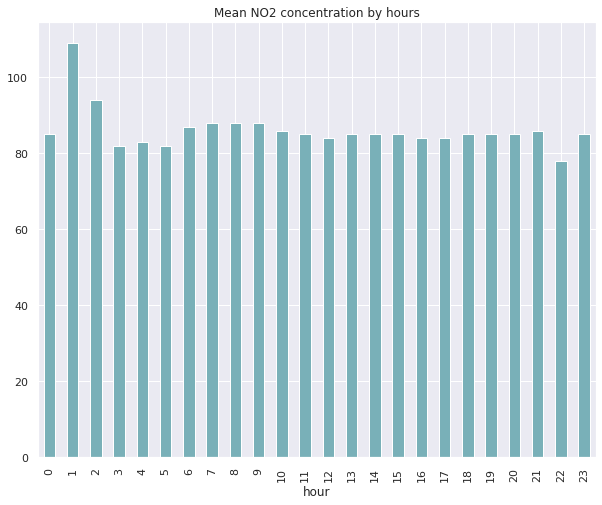

In [142]:
df_2['hour'] = pd.to_datetime(df_2['date.utc']).dt.hour
hours = df_2.groupby(['hour'])['value'].count()

fig = plt.figure(figsize=(10,8))
ax = hours.plot.bar(color='#79B0B8');
ax.set_title('Mean NO2 concentration by hours');
